In [120]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import math

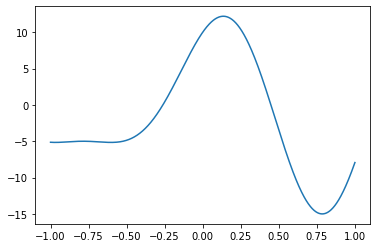

In [130]:
# Исходная функция
x = np.linspace(-1 , 1, num = 1000)

def f(x):
  return 10 * np.cos(4 * x) + 5 * np.sin(6 * x)

plt.plot(x, f(x))
plt.show()

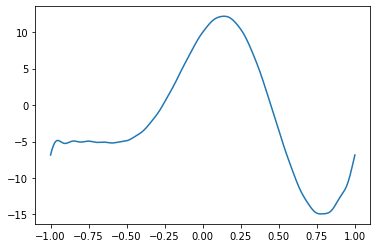

In [131]:
#Фурье
def an(n):
  def a(y):
    return f(y) * np.cos(math.pi * n * y)
  a, err = integrate.quad(a, -1, 1)
  return a

def bn(n):
  def b(y):
    return f(y) * np.sin(math.pi * n * y)
  b, err = integrate.quad(b, -1, 1)
  return b

def fur(x, m):
  sum = np.zeros_like(x)
  for i in range(1, m):
    sum += an(i) * np.cos(math.pi * i * x) + bn(i) * np.sin(math.pi * i * x)
  return an(0)/2 + sum

plt.plot(x, fur(x, 20))

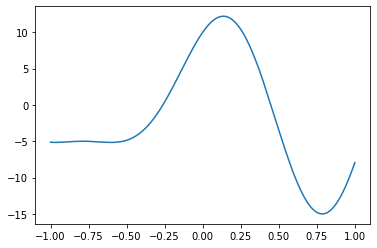

In [132]:
# полиномом Чебышева
t = np.linspace(0, math.pi, num = 1000)
x = np.cos(t)

def an_1(n):
  def a(y):
    return f(np.cos(y)) * np.cos(n * y)
  a, err = integrate.quad(a, 0, math.pi)
  return 2/math.pi * a


def cheb(t, N):
  sum = np.zeros_like(x)
  for i in range(1, N+1):
    sum += an_1(i) * np.cos(i * t)
  return an_1(0)/2 + sum

plt.plot(x, cheb(t, 18))

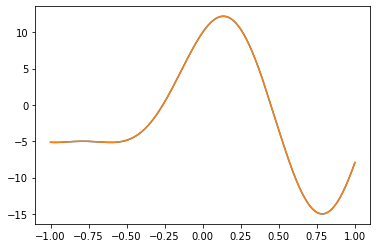

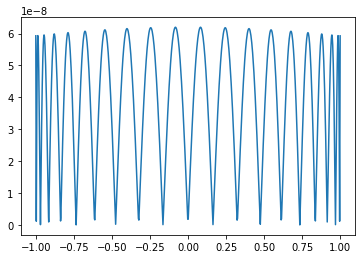

In [133]:
plt.plot(x, f(x))
plt.plot(x, cheb(t, 18))
plt.show()
plt.plot(x, np.abs(f(x) - cheb(t, 18)))

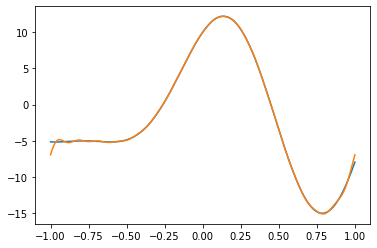

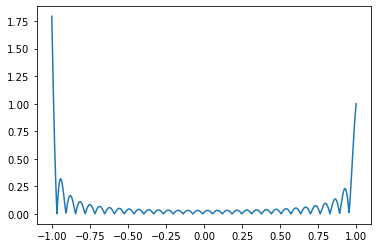

In [135]:
x = np.linspace(-1 , 1, num = 1000)
plt.plot(x, f(x))
plt.plot(x, fur(x, 16))
plt.show()
plt.plot(x, np.abs(f(x) - fur(x, 16)))